<a href="https://colab.research.google.com/github/reparadise/MachinelearningProjectAifel/blob/main/aiffel(Bicycleprediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Colab file 직접 올리기 (loading data)

In [3]:
from google.colab import files
files.upload()

Saving train.csv to train (1).csv


{'train.csv': b'datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count\n2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0,3,13,16\n2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0,8,32,40\n2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0,5,27,32\n2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0,3,10,13\n2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0,0,1,1\n2011-01-01 05:00:00,1,0,0,2,9.84,12.88,75,6.0032,0,1,1\n2011-01-01 06:00:00,1,0,0,1,9.02,13.635,80,0,2,0,2\n2011-01-01 07:00:00,1,0,0,1,8.2,12.88,86,0,1,2,3\n2011-01-01 08:00:00,1,0,0,1,9.84,14.395,75,0,1,7,8\n2011-01-01 09:00:00,1,0,0,1,13.12,17.425,76,0,8,6,14\n2011-01-01 10:00:00,1,0,0,1,15.58,19.695,76,16.9979,12,24,36\n2011-01-01 11:00:00,1,0,0,1,14.76,16.665,81,19.0012,26,30,56\n2011-01-01 12:00:00,1,0,0,1,17.22,21.21,77,19.0012,29,55,84\n2011-01-01 13:00:00,1,0,0,2,18.86,22.725,72,19.9995,47,47,94\n2011-01-01 14:00:00,1,0,0,2,18.86,22.725,72,19.0012,35,71,106\n2011-01-01 15:00:00,1,0,0,2,18.04,21.97,77,1

In [4]:
ls

 sample_data/  'train (1).csv'   train.csv


In [5]:
train = pd.read_csv("/content/train.csv")
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


#Create column

In [6]:
train['datetime'] = pd.to_datetime(train['datetime'], format='%Y-%m-%d %H:%M:%S')

In [7]:
train['year'] = pd.DatetimeIndex(train['datetime']).year
train['month'] = pd.DatetimeIndex(train['datetime']).month
train['day'] = pd.DatetimeIndex(train['datetime']).day
train['hour'] = pd.DatetimeIndex(train['datetime']).hour
train['minute'] = pd.DatetimeIndex(train['datetime']).minute
train['second'] = pd.DatetimeIndex(train['datetime']).second
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,0,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,0,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,0,0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3,0,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4,0,0


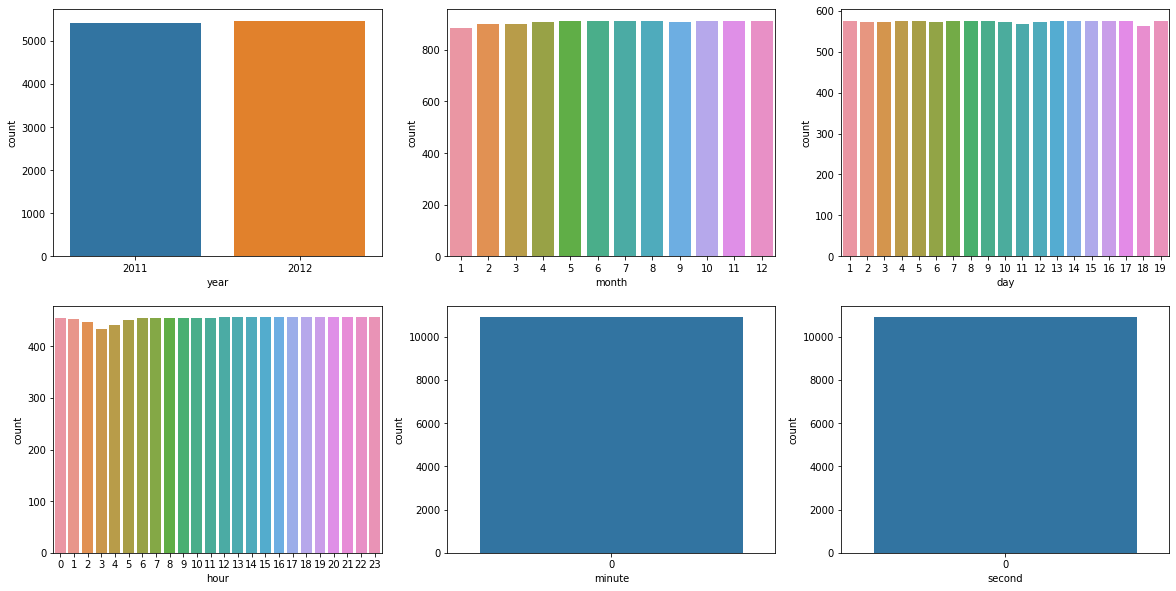

In [8]:
plt.figure(figsize=(20,10))
plt.subplot(2,3,1)
sns.countplot(x='year', data=train)

plt.subplot(2,3,2)
sns.countplot(x='month', data=train)

plt.subplot(2,3,3)
sns.countplot(x='day', data=train)

plt.subplot(2,3,4)
sns.countplot(x='hour', data=train)

plt.subplot(2,3,5)
sns.countplot(x='minute', data=train)

plt.subplot(2,3,6)
sns.countplot(x='second', data=train)

plt.show()

In [9]:
X = train[['season', 'workingday', 'weather', 'temp', 'atemp', 'humidity', 'windspeed', 'year', 'month', 'day', 'hour',]].values
y = train[['count']].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)


Train


In [10]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [11]:
LinearRegression()

LinearRegression()

In [12]:
predictions = model.predict(X_test)
predictions

array([[-33.96697339],
       [ 59.23679918],
       [112.62548605],
       ...,
       [195.79183719],
       [197.74006566],
       [294.24680107]])

In [13]:
rmse = mean_squared_error(y_test, predictions, squared = False)
rmse

140.47528542723464

In [14]:
col = ['season', 'workingday', 'weather', 'temp', 'atemp', 'humidity', 'windspeed', 'year', 'month', 'day', 'hour']
X_test_df = pd.DataFrame(X_test, columns=col)
X_test_df['predictions'] = predictions
X_test_df['y_test'] = y_test

In [15]:
X_test_df

,season,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,hour,predictions,y_test
0,1.0,1.0,2.0,6.56,9.090,80.0,8.9981,2011.0,2.0,4.0,9.0,-33.966973,127
1,2.0,1.0,2.0,14.76,16.665,71.0,19.0012,2011.0,4.0,8.0,10.0,59.236799,73
2,3.0,1.0,3.0,24.60,27.275,88.0,8.9981,2011.0,9.0,7.0,9.0,112.625486,190
3,2.0,1.0,1.0,16.40,20.455,56.0,23.9994,2011.0,4.0,4.0,1.0,44.829705,11
4,4.0,1.0,2.0,22.14,25.760,49.0,8.9981,2012.0,10.0,17.0,13.0,303.039383,310
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2173,1.0,1.0,1.0,12.30,13.635,61.0,19.9995,2012.0,3.0,7.0,1.0,76.753725,5
2174,1.0,1.0,1.0,28.70,31.820,39.0,16.9979,2012.0,3.0,15.0,17.0,356.228964,713
2175,2.0,1.0,1.0,18.86,22.725,72.0,15.0013,2011.0,5.0,6.0,22.0,195.791837,151
2176,1.0,1.0,1.0,12.30,13.635,42.0,31.0009,2012.0,1.0,18.0,13.0,197.740066,130


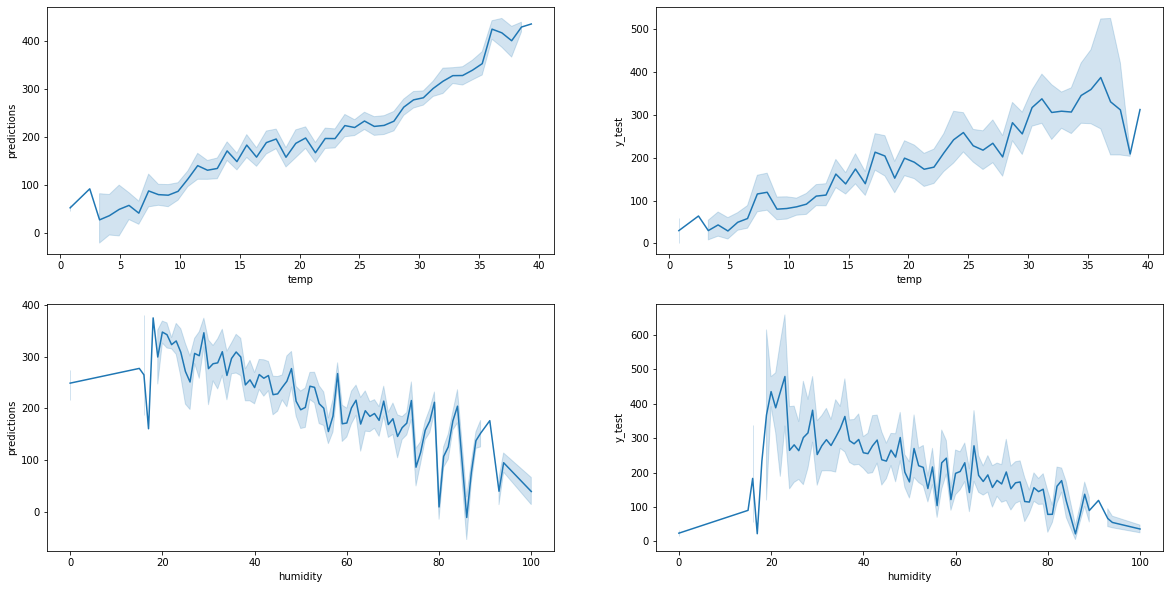

In [16]:
plt.figure(figsize=(20,10))
plt.subplot(2,2,1)
sns.lineplot(x=X_test_df['temp'], y=X_test_df['predictions'])

plt.subplot(2,2,2)
sns.lineplot(x=X_test_df['temp'], y=X_test_df['y_test'])

plt.subplot(2,2,3)
sns.lineplot(x=X_test_df['humidity'], y=X_test_df['predictions'])

plt.subplot(2,2,4)
sns.lineplot(x=X_test_df['humidity'], y=X_test_df['y_test'])

plt.show()

회고 : 코랩으로 파일 직접올리기를 하여 코드를 참조하여 실행.